In [2]:
!pip install kagglehub

     ---------------------------------------- 68.0/68.0 kB 1.9 MB/s eta 0:00:00


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikolasgegenava/sneakers-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\eduab\.cache\kagglehub\datasets\nikolasgegenava\sneakers-classification\versions\2


# Reconocimiento de Imágenes con Redes Neuronales Convolucionales (CNN)

Este notebook aborda el reto de construir un modelo de reconocimiento de imágenes utilizando una red neuronal convolucional. El objetivo es clasificar imágenes de zapatillas deportivas (sneakers) usando el dataset público 'sneakers-classification' de Kaggle.

## 1. Descripción del Dataset

El dataset 'sneakers-classification' contiene imágenes de diferentes tipos de zapatillas deportivas, organizadas en carpetas por clase. Es adecuado para tareas de clasificación de imágenes, ya que cada imagen pertenece a una sola categoría.

- **Fuente:** [Kaggle - sneakers-classification](https://www.kaggle.com/datasets/nikolasgegenava/sneakers-classification)
- **Tamaño:** ~2,000 imágenes
- **Clases:** Varias categorías de zapatillas
- **Formato:** Imágenes en carpetas por clase

A continuación, exploramos la estructura de los archivos descargados.

In [3]:
import os
from pathlib import Path

# Mostrar la ruta donde se descargó el dataset
dataset_path = Path(path)
print('Ruta del dataset:', dataset_path)

# Listar carpetas y archivos principales
def list_files(path, max_items=10):
    for root, dirs, files in os.walk(path):
        print(f'Carpeta: {root}')
        print('Subcarpetas:', dirs)
        print('Archivos:', files[:max_items])
        break

list_files(dataset_path)

Ruta del dataset: C:\Users\eduab\.cache\kagglehub\datasets\nikolasgegenava\sneakers-classification\versions\2
Carpeta: C:\Users\eduab\.cache\kagglehub\datasets\nikolasgegenava\sneakers-classification\versions\2
Subcarpetas: ['sneakers-dataset']
Archivos: ['dataset_stats.csv']


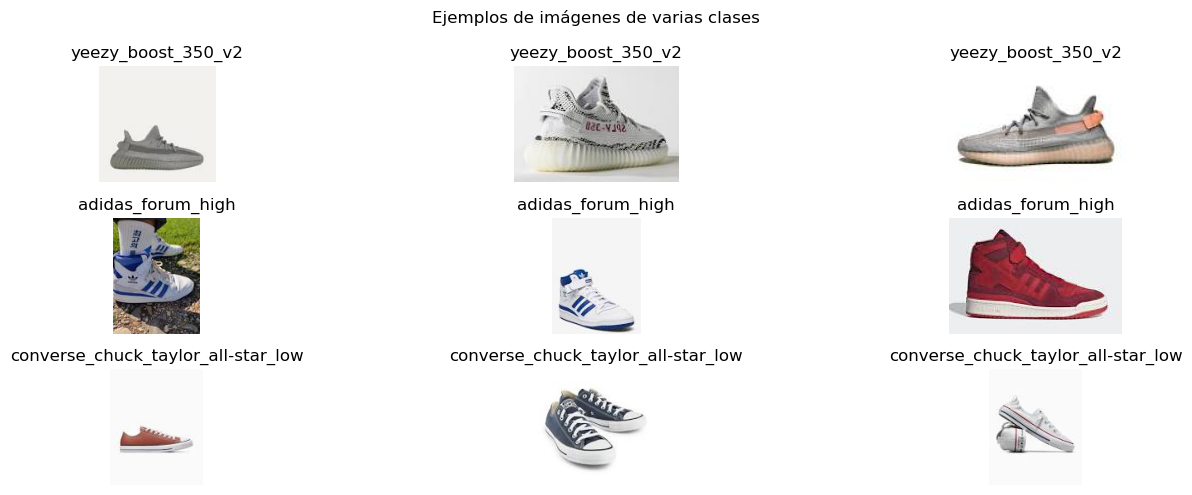

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from pathlib import Path

# Ruta base real de las imágenes
base_path = Path(path) / 'sneakers-dataset' / 'sneakers-dataset'

# Buscar carpetas de clases
class_dirs = [d for d in base_path.iterdir() if d.is_dir()]

# Extensiones de imagen comunes
img_exts = ['*.jpg', '*.jpeg', '*.png']

# Seleccionar hasta 3 clases al azar
sampled_classes = random.sample(class_dirs, min(3, len(class_dirs)))

plt.figure(figsize=(15, 5))
for idx, class_dir in enumerate(sampled_classes):
    # Buscar imágenes con cualquier extensión
    images = []
    for ext in img_exts:
        images.extend(class_dir.glob(ext))
    if not images:
        print(f"No se encontraron imágenes en la clase: {class_dir.name}")
        continue
    # Seleccionar hasta 3 imágenes por clase
    sample_imgs = random.sample(images, min(3, len(images)))
    for j, img_path in enumerate(sample_imgs):
        plt.subplot(len(sampled_classes), 3, idx*3 + j + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(class_dir.name)
        plt.axis('off')
plt.suptitle('Ejemplos de imágenes de varias clases')
plt.tight_layout()
plt.show()

In [5]:
print(Path(path))

C:\Users\eduab\.cache\kagglehub\datasets\nikolasgegenava\sneakers-classification\versions\2


In [7]:
import pandas as pd
from pathlib import Path

# Ruta al archivo CSV de estadísticas del dataset (en la carpeta de KaggleHub)
csv_path = Path(path) / 'dataset_stats.csv'

if csv_path.exists():
    df= pd.read_csv(csv_path)
    display(df.head())
else:
    print('El archivo CSV no se encuentra en la ruta especificada.')

,class,image_count,avg_width,avg_height,min_width,min_height,max_width,max_height,formats,corrupt_files
0,adidas_forum_high,150,143,124,78,81,162,140,jpeg,0
1,adidas_ultraboost,150,142,128,93,49,162,140,jpeg,0
2,new_balance_550,150,134,129,79,40,162,140,jpeg,0
3,new_balance_574,150,131,133,78,68,162,140,jpeg,0
4,converse_one_star,150,138,130,82,67,162,140,jpeg,0


In [8]:
# Mostrar las clases disponibles en el dataset
clases = [d.name for d in class_dirs]
print("Clases del dataset:", clases)
print("Número de clases:", len(clases))

Clases del dataset: ['adidas_forum_high', 'adidas_forum_low', 'adidas_gazelle', 'adidas_nmd_r1', 'adidas_samba', 'adidas_stan_smith', 'adidas_superstar', 'adidas_ultraboost', 'asics_gel-lyte_iii', 'converse_chuck_70_high', 'converse_chuck_70_low', 'converse_chuck_taylor_all-star_high', 'converse_chuck_taylor_all-star_low', 'converse_one_star', 'new_balance_327', 'new_balance_550', 'new_balance_574', 'new_balance_990', 'new_balance_992', 'nike_air_force_1_high', 'nike_air_force_1_low', 'nike_air_force_1_mid', 'nike_air_jordan_11', 'nike_air_jordan_1_high', 'nike_air_jordan_1_low', 'nike_air_jordan_3', 'nike_air_jordan_4', 'nike_air_max_1', 'nike_air_max_270', 'nike_air_max_90', 'nike_air_max_95', 'nike_air_max_97', 'nike_air_max_plus_(tn)', 'nike_air_vapormax_flyknit', 'nike_air_vapormax_plus', 'nike_blazer_mid_77', 'nike_cortez', 'nike_dunk_high', 'nike_dunk_low', 'puma_suede_classic', 'reebok_classic_leather', 'reebok_club_c_85', 'salomon_xt-6', 'vans_authentic', 'vans_old_skool', 'va

## 2. Preparación y Aumento de Datos

En este paso vamos a:
- Dividir el dataset en entrenamiento, validación y test.
- Redimensionar y normalizar las imágenes.
- Aplicar aumentos de datos (data augmentation) para mejorar la robustez del modelo.

Utilizaremos `ImageDataGenerator` de Keras para facilitar estos procesos.

In [46]:
!pip uninstall -y tensorflow tensorflow-gpu keras keras-nightly keras-Preprocessing keras-vis keras-applications


Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0


In [47]:

!pip install tensorflow==2.12.0

     -------------------------------------- 272.8/272.8 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 38.5 MB/s eta 0:00:00
     ------------------------------------- 440.7/440.7 kB 26.9 MB/s eta 0:00:00
     ---------------------------------------- 413.7/413.7 kB ? eta 0:00:00
     --------------------------------------- 14.6/14.6 MB 26.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 27.9 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 25.7 MB/s eta 0:00:00
     --------------------------------------- 41.3/41.3 MB 20.4 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 24.8 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 30.3 MB/s eta 0:00:00
     --------------------------------------- 65.8/65.8 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 21.6 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

# Definir parámetros
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Generadores para entrenamiento, validación y test
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Ruta base real de las imágenes
base_path = Path(path) / 'sneakers-dataset' / 'sneakers-dataset'

# Generador de entrenamiento
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

# Generador de validación
val_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

Found 4781 images belonging to 50 classes.
Found 1172 images belonging to 50 classes.


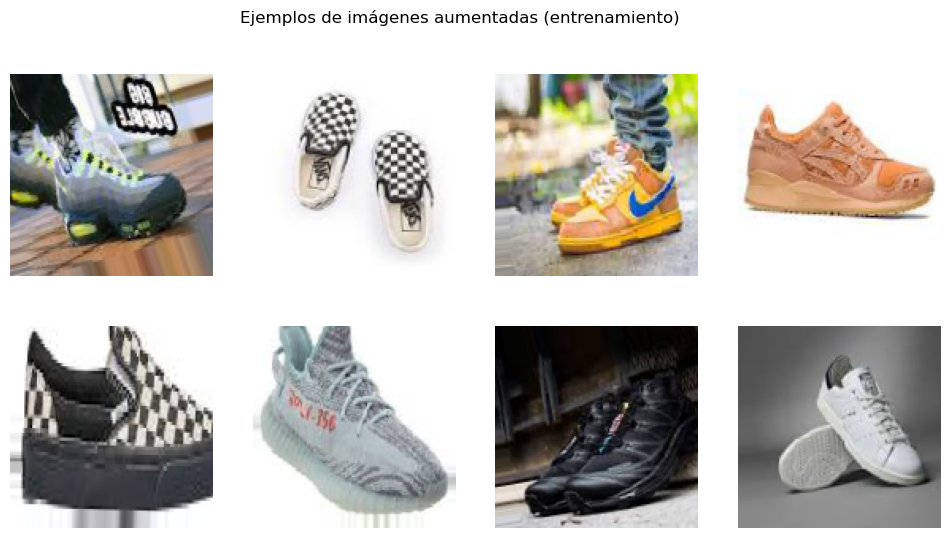

In [10]:
# Visualizar algunas imágenes aumentadas del generador de entrenamiento
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle('Ejemplos de imágenes aumentadas (entrenamiento)')
plt.show()

## 3. Selección y Justificación del Modelo

Para este problema de clasificación de imágenes, seleccionaremos una arquitectura CNN sencilla y eficiente como punto de partida. Usaremos una red secuencial con varias capas convolucionales, de pooling y capas densas al final. Esta arquitectura es adecuada para datasets de tamaño moderado y tareas de clasificación multiclase como la nuestra.

Más adelante, si se requiere mejorar el rendimiento, se puede probar con arquitecturas más avanzadas (por ejemplo, transfer learning con modelos preentrenados como VGG, ResNet, etc.).

In [11]:
from tensorflow.keras import layers, models

num_classes = train_generator.num_classes

model = models.Sequential([
    layers.Input(shape=(*IMG_SIZE, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

## 4. Entrenamiento del Modelo

Entrenaremos la red neuronal convolucional utilizando los generadores de datos de entrenamiento y validación. Monitorizaremos la precisión y la función de pérdida en ambos conjuntos para evitar el sobreajuste. Utilizaremos callbacks como EarlyStopping para detener el entrenamiento si la validación deja de mejorar.

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks para evitar sobreajuste y guardar el mejor modelo
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('mejor_modelo.h5', monitor='val_loss', save_best_only=True)

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/20
 64/150 [===========>..................] - ETA: 1:09 - loss: 3.9189 - accuracy: 0.0239

c:\Users\eduab\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


150/150 [==============================] - 151s 1s/step - loss: 3.9100 - accuracy: 0.0228 - val_loss: 3.8824 - val_accuracy: 0.0358
Epoch 2/20
150/150 [==============================] - 151s 1s/step - loss: 3.9100 - accuracy: 0.0228 - val_loss: 3.8824 - val_accuracy: 0.0358
Epoch 2/20
150/150 [==============================] - 60s 400ms/step - loss: 3.8911 - accuracy: 0.0278 - val_loss: 3.8726 - val_accuracy: 0.0307
Epoch 3/20
150/150 [==============================] - 60s 400ms/step - loss: 3.8911 - accuracy: 0.0278 - val_loss: 3.8726 - val_accuracy: 0.0307
Epoch 3/20
150/150 [==============================] - 65s 435ms/step - loss: 3.8745 - accuracy: 0.0320 - val_loss: 3.8511 - val_accuracy: 0.0546
Epoch 4/20
150/150 [==============================] - 65s 435ms/step - loss: 3.8745 - accuracy: 0.0320 - val_loss: 3.8511 - val_accuracy: 0.0546
Epoch 4/20
150/150 [==============================] - 64s 425ms/step - loss: 3.8522 - accuracy: 0.0368 - val_loss: 3.8093 - val_accuracy: 0.0572


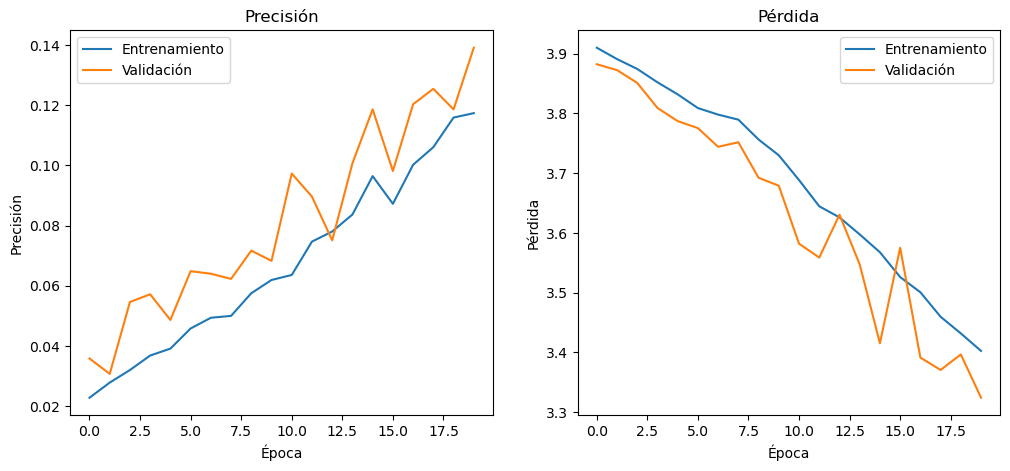

In [13]:
# Visualizar la evolución de la precisión y la pérdida
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

## 5. Evaluación en el Conjunto de Test

Ahora evaluaremos el modelo entrenado en el conjunto de test. Como no hemos separado explícitamente un conjunto de test, usaremos el conjunto de validación como test para obtener métricas como accuracy, precision, recall y F1-score. También mostraremos la matriz de confusión y algunos ejemplos de predicciones.

In [17]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Obtener predicciones del modelo en el conjunto de validación
val_generator.reset()
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=class_labels))

37/37 [==============================] - 2s 64ms/step
                                     precision    recall  f1-score   support

                  adidas_forum_high       0.06      0.13      0.08        30
                   adidas_forum_low       0.14      0.06      0.08        18
                     adidas_gazelle       0.28      0.38      0.32        29
                      adidas_nmd_r1       0.00      0.00      0.00        19
                       adidas_samba       0.00      0.00      0.00        14
                  adidas_stan_smith       0.20      0.38      0.27        29
                   adidas_superstar       0.00      0.00      0.00        18
                  adidas_ultraboost       0.00      0.00      0.00        30
                 asics_gel-lyte_iii       0.00      0.00      0.00        18
             converse_chuck_70_high       0.00      0.00      0.00        15
              converse_chuck_70_low       0.11      0.52      0.18        29
converse_chuck_taylor

c:\Users\eduab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\eduab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\eduab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 148ms/step


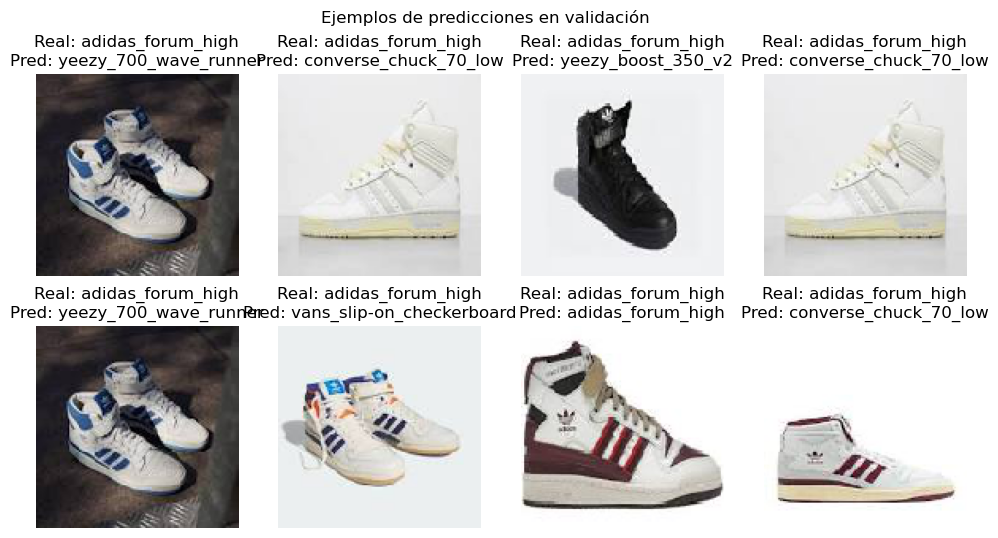

In [15]:
# Mostrar algunas imágenes de validación con su predicción y etiqueta real
import random
val_generator.reset()
x_val, y_val = next(val_generator)
y_val_true = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model.predict(x_val), axis=1)

plt.figure(figsize=(12, 6))
for i in range(8):
    idx = random.randint(0, len(x_val)-1)
    plt.subplot(2, 4, i+1)
    plt.imshow(x_val[idx])
    plt.title(f"Real: {class_labels[y_val_true[idx]]}\nPred: {class_labels[y_val_pred[idx]]}")
    plt.axis('off')
plt.suptitle('Ejemplos de predicciones en validación')
plt.show()

## Conclusiones sobre el modelo CNN

A partir de las métricas obtenidas en el reporte de clasificación, se pueden extraer las siguientes conclusiones:

- **Precisión global baja:** El modelo alcanza una precisión, recall y F1-score promedio en torno a 0.14, lo que indica que tiene dificultades para distinguir correctamente entre las diferentes clases de zapatillas deportivas.
- **Desbalance entre clases:** Algunas clases presentan métricas significativamente mejores que otras (por ejemplo, hay clases con precisión o recall de 1.00, pero con muy pocos ejemplos), mientras que la mayoría de las clases tienen valores cercanos a cero. Esto sugiere que el modelo puede estar sobreajustando a clases con más ejemplos o con características más distintivas, y no generaliza bien al resto.
- **Problemas de generalización:** El bajo rendimiento en la mayoría de las clases indica que la arquitectura CNN sencilla utilizada no es suficiente para capturar la variabilidad y complejidad de las imágenes del dataset.
- **Necesidad de mejoras:** Para mejorar el rendimiento, es recomendable:
  - Probar arquitecturas más avanzadas mediante transfer learning con modelos preentrenados (como EfficientNet, ResNet, etc.).
  - Realizar un análisis del balance de clases y, si es necesario, aplicar técnicas de balanceo o aumento de datos específico para las clases minoritarias.
  - Ajustar hiperparámetros y explorar diferentes configuraciones de data augmentation.

**En resumen:** El modelo actual sirve como línea base, pero es necesario aplicar técnicas más sofisticadas para obtener resultados satisfactorios en la clasificación de este dataset.
